# The Overlapping Generations Model

In this lecture we study the so-called overlapping generations (OLG) model, which
is used by policy makers and researchers to examine

- fiscal policy  
- monetary policy  
- long run growth  


and many other topics.

The first rigorous version of the OLG model was developed by Paul Samuelson
([Samuelson, 1958](https://www.jstor.org/stable/1826989?seq=5)).

Our aim is to gain a good understanding of a simple version of the OLG
model.

## Overview

The dynamics of the OLG model are quite similar to those of the Solow-Swan
growth model which we discussed earlier.

At the same time, the OLG model adds an important new feature: __the choice of
how much to save is endogenous.__

To see why this is important, suppose, for example, that we are interested in
predicting the effect of a new tax on long-run growth.

We could add a tax to the Solow-Swan model and look at the change in the
steady state.

But this ignores the fact that __households will change their savings and
consumption behavior when they face the new tax rate.__

__Such changes can substantially alter the predictions of the model.__

Hence, if we care about accurate predictions, we should model the decision
problems of the agents.

In particular, __households in the model should decide how much to save and how
much to consume, given the environment that they face__ (technology, taxes,
prices, etc.)

The OLG model takes up this challenge, and allows us to study some implications for long run growth.

Let’s start with some imports.

In [125]:
import numpy as np
from scipy import optimize
from collections import namedtuple
import matplotlib.pyplot as plt

## Environment

We assume that time is discrete, so that $ t=0, 1, \ldots $

An individual born at time $ t $ lives for two periods, $ t $ and $ t + 1 $.

We call an agent

- “young” during the first period of their lives and  
- “old” during the second period of their lives.  


Young agents work, supply labor and earn labor income.

They also decide how much to save.

Old agents do not work, so their income is given by their financial income.

Their financial income is from interest on their savings from wage income,
which is then combined with the labor of the new young generation at $ t+1 $.

The wage and interest rates are determined in equilibrium by supply and
demand.

To make the algebra slightly easier, we are going to assume a constant
population size.

We normalize the constant population size in each period to 1.

We also suppose that each agent supplies one “unit” of labor hours, so total
labor supply is 1.

## Supply of capital

First let’s consider the household side.

### Consumer’s problem

Suppose that utility for individuals born at time $ t $ takes the form


<a id='equation-eq-crra'></a>
$$
U_t = u(c_t) + \beta u(c_{t+1}) \tag{1}
$$

Here

- $ u()$ is called the “flow” utility function  
- $ \beta \in (0, 1) $ is the discount factor  
- $ c_t $ is time $ t $ consumption of the individual born at time $ t $  
- $ c_{t+1} $ is time $ t+1 $ consumption of the same individual  


We assume that $ u $ is strictly increasing (more consumption is better).

Savings behavior is determined by the optimization problem


<a id='equation-max-sav-olg'></a>
$$
\max_{c_t, c_{t+1}} 
    \,  \left \{ u(c_t) + \beta u(c_{t+1}) \right \} \tag{2}
$$

subject to

$$
c_t + s_t \le w_t 
     \quad \text{and} \quad
     c_{t+1}   \le R_{t+1} s_t
$$

* either consumes ro saves less than wage w,, consume based on interest rate R
* only choice is $s_t$
* wont borrow bc in utility function if u borrow $s_t$ must be negative tmrw,, which cant happen so consumption must be positive and cannot borrow 

Here

- $ s_t $ is savings by an individual born at time $ t $  
- $ w_t $ is the wage rate at time $ t $  
- $ R_{t+1} $ is the interest rate on savings invested at time $ t $, paid at time $ t+1 $  


Since $ u $ is strictly increasing, both of these constraints will hold as equalities at the maximum. ,,,, utiliy inc if consume more wouldnt want to waste

Using this fact and substituting $ s_t $ from the first constraint into the second we get
$ c_{t+1} = R_{t+1}(w_t - c_t) $.

The first-order condition for a maximum can be obtained
by plugging $ c_{t+1} $ into the objective function, taking the derivative
with respect to $ c_t $, and setting it to zero.

This leads to the **Euler equation** of the OLG model, which is


<a id='equation-euler-1-olg'></a>
$$
u'(c_t) = \beta R_{t+1}  u'( R_{t+1} (w_t - c_t)) \tag{3}
$$

From the first constraint we get $ c_t = w_t - s_t $, so the Euler equation
can also be expressed as


<a id='equation-euler-2-olg'></a>
$$
u'(w_t - s_t) = \beta R_{t+1}  u'( R_{t+1} s_t) \tag{4}
$$

Suppose that, for each $ w_t $ and $ R_{t+1} $, there is exactly one $ s_t $ that
solves [(4)](#equation-euler-2-olg).

Then savings can be written as a fixed function of $ w_t $ and $ R_{t+1} $.

We write this as


<a id='equation-saving-1-olg'></a>
$$
s_t = s(w_t, R_{t+1}) \tag{5}
$$

The precise form of the function $ s $ will depend on the choice of flow utility
function $ u $.

Together, $ w_t $ and $ R_{t+1} $ represent the *prices* in the economy (price of
labor and rental rate of capital).

Thus, [(5)](#equation-saving-1-olg) states the quantity of savings given prices.

### Example: log preferences

In the special case $ u(c) = \log c $, the Euler equation simplifies to
$ s_t= \beta (w_t - s_t) $.

Solving for saving, we get


<a id='equation-saving-log-2-olg'></a>
$$
s_t = s(w_t, R_{t+1}) = \frac{\beta}{1+\beta} w_t \tag{6}
$$

In this special case, savings does not depend on the interest rate.

* wealthier income effect consume more today
* but substiution effect is get more want to save more to benefit from higher interest rate
* move in opposite directions, but in log utility function they exactly offset
* SOOOO savings of log utility doesnt depend on interest rate.

### Savings and investment

Since the population size is normalized to 1, $ s_t $ is also total savings in
the economy at time $ t $.

In our closed economy, there is no foreign investment, so net savings equals
total investment, which can be understood as supply of capital to firms.

In the next section we investigate demand for capital.

Equating supply and demand will allow us to determine the equilibrium in the OLG
economy.

* savings is like supply bc closed economy

## Demand for capital

First we describe the firm problem and then we write down an equation
describing demand for capital given prices.

### Firm’s problem

For each integer $ t \geq 0 $, output $ y_t $ in period $ t $ is given by the
**[Cobb-Douglas production function](https://en.wikipedia.org/wiki/Cobb%E2%80%93Douglas_production_function)**


<a id='equation-cobb-douglas'></a>
$$
y_t = k_t^{\alpha} \ell_t^{1-\alpha} \tag{7}
$$

Here $ k_t $ is capital, $ \ell_t $ is labor, and  $ \alpha $ is the capital share.

The profit maximization problem of the firm is


<a id='equation-opt-profit-olg'></a>
$$
\max_{k_t, \ell_t} \{ k^{\alpha}_t \ell_t^{1-\alpha} - R_t k_t - \ell_t w_t   \} \tag{8}
$$

The first-order conditions are obtained by taking the derivative of the
objective function with respect to capital and labor respectively and setting
them to zero:

$$
(1-\alpha)(k_t / \ell_t)^{\alpha} = w_t
    \quad \text{and} \quad
    \alpha (k_t / \ell_t)^{\alpha - 1} = R_t
$$

* plug in to solve first foc with derivative
* foc w respect to capital and labor separate and set to 0 

### Demand

* to clear $\ell_t$ must be equal to 1
* can only do this replacement after maximizing with FOC


Using our assumption $ \ell_t = 1 $ allows us to write


<a id='equation-wage-one'></a>
$$
w_t = (1-\alpha)k_t^\alpha \tag{9}
$$

and


<a id='equation-interest-rate-one'></a>
$$
R_t =
    \alpha k_t^{\alpha - 1} \tag{10}
$$

Rearranging [(10)](#equation-interest-rate-one) gives the aggregate demand for capital
at time $ t+1 $


<a id='equation-aggregate-demand-capital-olg'></a>
$$
k^d (R_{t+1}) 
    := \left (\frac{\alpha}{R_{t+1}} \right )^{1/(1-\alpha)} \tag{11}
$$

In Python code this is

* wage in period t depends on capital in period t, as in equation 9 

In [135]:
def capital_demand(R, α):
    return (α/R)**(1/(1-α)) 

In [136]:
def capital_supply(R, β, w):
    R = np.ones_like(R)
    return R * (β / (1 + β)) * w

The next figure plots the supply of capital, as in [(6)](#equation-saving-log-2-olg), as well as the demand for capital, as in [(11)](#equation-aggregate-demand-capital-olg), as functions of the interest rate $ R_{t+1} $.

(For the special case of log utility, supply does not depend on the interest rate, so we have a constant function.)

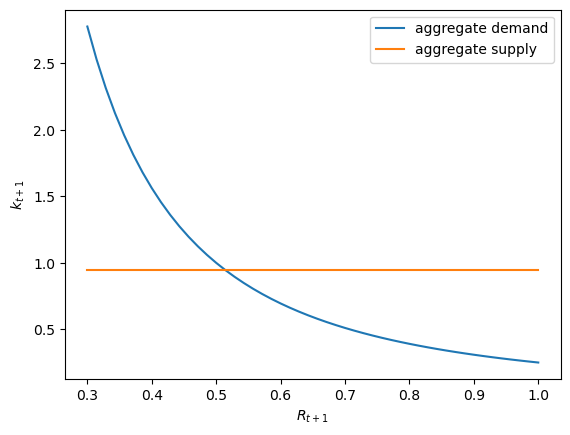

In [138]:
R_vals = np.linspace(0.3, 1) #range of interest rates
α, β = 0.5, 0.9
w = 2.0 #wage given,, so not general equili only partial, clearing capital market only here

fig, ax = plt.subplots()

ax.plot(R_vals, capital_demand(R_vals, α), 
        label="aggregate demand")
ax.plot(R_vals, capital_supply(R_vals, β, w), 
        label="aggregate supply")

ax.set_xlabel("$R_{t+1}$")
ax.set_ylabel("$k_{t+1}$")
ax.legend()
plt.show()

## Equilibrium

In this section we derive equilibrium conditions and investigate an example.

### Equilibrium conditions

In equilibrium, savings at time $ t $ equals investment at time $ t $, which
equals capital supply at time $ t+1 $.

Equilibrium is computed by equating these quantities, setting


<a id='equation-equilibrium-1'></a>
$$
s(w_t, R_{t+1}) 
    = k^d(R_{t+1})
    = \left (\frac{\alpha}{R_{t+1}} \right )^{1/(1-\alpha)} \tag{12}
$$

In principle, we can now solve for the equilibrium price $ R_{t+1} $ given $ w_t $.

(In practice, we first need to specify the function $ u $ and hence $ s $.)

When we solve this equation, which concerns time $ t+1 $ outcomes, time
$ t $ quantities are already determined, so we can treat $ w_t $ as a constant.

From equilibrium $ R_{t+1} $ and [(11)](#equation-aggregate-demand-capital-olg), we can obtain
the equilibrium quantity $ k_{t+1} $.

### Example: log utility

In the case of log utility, we can use [(12)](#equation-equilibrium-1) and [(6)](#equation-saving-log-2-olg) to obtain


<a id='equation-equilibrium-2'></a>
$$
\frac{\beta}{1+\beta} w_t
    = \left( \frac{\alpha}{R_{t+1}} \right)^{1/(1-\alpha)} \tag{13}
$$

Solving for the equilibrium interest rate gives


<a id='equation-equilibrium-price'></a>
$$
R_{t+1} = 
    \alpha 
    \left( 
        \frac{\beta}{1+\beta} w_t
    \right)^{\alpha-1} \tag{14}
$$

In Python we can compute this via

In [144]:
def equilibrium_R_log_utility(α, β, w):
    R = α * ( (β * w) / (1 + β))**(α - 1)
    return R

#for given wage can find R in equilibrium

In the case of log utility, since capital supply does not depend on the interest rate, the equilibrium quantity is fixed by supply.

That is,


<a id='equation-equilibrium-quantity'></a>
$$
k_{t+1} = s(w_t, R_{t+1}) = \frac{\beta }{1+\beta} w_t \tag{15}
$$

Let’s redo our plot above but now inserting the equilibrium quantity and price.

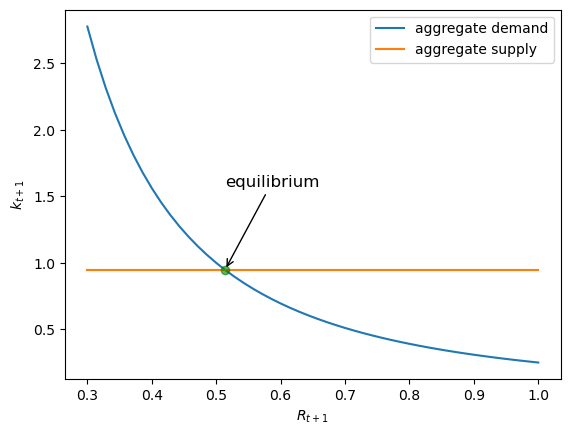

In [148]:
R_vals = np.linspace(0.3, 1)
α, β = 0.5, 0.9
w = 2.0

fig, ax = plt.subplots()

ax.plot(R_vals, capital_demand(R_vals, α), 
        label="aggregate demand")
ax.plot(R_vals, capital_supply(R_vals, β, w), 
        label="aggregate supply")

R_e = equilibrium_R_log_utility(α, β, w)
k_e = (β / (1 + β)) * w

ax.plot(R_e, k_e, 'go', ms=6, alpha=0.6)

ax.annotate(r'equilibrium',
             xy=(R_e, k_e),
             xycoords='data',
             xytext=(0, 60),
             textcoords='offset points',
             fontsize=12,
             arrowprops=dict(arrowstyle="->"))

ax.set_xlabel("$R_{t+1}$")
ax.set_ylabel("$k_{t+1}$")
ax.legend()
plt.show()

## Dynamics

* sub effect and income effect bc supply not rely on rates

In this section, we discuss dynamics of the model.

For now we will focus on the case of log utility, so that the equilibrium is determined by [(15)](#equation-equilibrium-quantity).

### Evolution of capital

* solving general equilibrium
* $\beta$ affect savings now, length of life or tax on savings now affect model 

  
The discussion above shows how equilibrium $ k_{t+1} $ is obtained given $ w_t $.

From [(9)](#equation-wage-one) we can translate this into $ k_{t+1} $ as a function of $ k_t $

In particular, since $ w_t = (1-\alpha)k_t^\alpha $, we have


<a id='equation-law-of-motion-capital'></a>
$$
k_{t+1} = \frac{\beta}{1+\beta} (1-\alpha)(k_t)^{\alpha} \tag{16}
$$

If we iterate on this equation, we get a sequence for capital stock.

Let’s plot the 45 degree diagram of these dynamics, which we write as

$$
k_{t+1} = g(k_t)
    \quad \text{where }
    g(k) := \frac{\beta}{1+\beta} (1-\alpha)(k)^{\alpha}
$$

* $\alpha-1$ is negative so whole thing becomes negative
* thus giving concave shape and dec returns to scale 

In [152]:
def k_update(k, α, β):
    return β * (1 - α) * k**α /  (1 + β)

<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:15: SyntaxWarning: invalid escape sequence '\c'
C:\Users\saman\AppData\Local\Temp\ipykernel_19420\3671140633.py:15: SyntaxWarning: invalid escape sequence '\c'
  ax.plot(k_grid, k_grid, 'k-', lw=1, alpha=0.7, label='$45^{\circ}$') #45 degree line


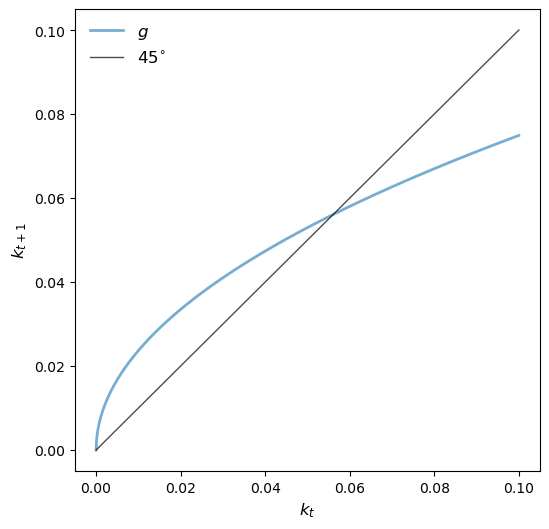

In [154]:
α, β = 0.5, 0.9
kmin, kmax = 0, 0.1
x = 1000 #1000 points
k_grid = np.linspace(kmin, kmax, x)
k_grid_next = np.empty_like(k_grid) #empty grid but same size as k grid

for i in range(x): #step through periods x
    k_grid_next[i] = k_update(k_grid[i], α, β) #first period and feed in next k+1 update 

fig, ax = plt.subplots(figsize=(6, 6))

ymin, ymax = np.min(k_grid_next), np.max(k_grid_next)

ax.plot(k_grid, k_grid_next,  lw=2, alpha=0.6, label='$g$')
ax.plot(k_grid, k_grid, 'k-', lw=1, alpha=0.7, label='$45^{\circ}$') #45 degree line 


ax.legend(loc='upper left', frameon=False, fontsize=12)
ax.set_xlabel('$k_t$', fontsize=12)
ax.set_ylabel('$k_{t+1}$', fontsize=12)

plt.show()

#plot with k_t on the x axis and k_t+1 on the y axis. compare ot 45 degree line, our g line has concave shape bc alpha < 1 and its the second derivative 

In [156]:
#steady state where g crosses 45 degree line,, depends a lot on alpha being smaller than 1

### Steady state (log case)

* can only solve byhand for the log utility case
* take equation 16 and $k_{t+1} = k_t$ ,, plug in 

  
The diagram shows that the model has a unique positive steady state, which we
denote by $ k^* $.

We can solve for $ k^* $ by setting $ k^* = g(k^*) $, or


<a id='equation-steady-state-1'></a>
$$
k^* = \frac{\beta (1-\alpha) (k^*)^{\alpha}}{(1+\beta)} \tag{17}
$$

* divide both sides by $(k^*)^\alpha$

  
Solving this equation yields


<a id='equation-steady-state-2'></a>
$$
k^* = \left (\frac{\beta (1-\alpha)}{1+\beta} \right )^{1/(1-\alpha)} \tag{18}
$$

We can get the steady state interest rate from [(10)](#equation-interest-rate-one), which yields

* plug in the $(k^*)^\alpha$ equation into equation 10 

$$
R^* = \alpha (k^*)^{\alpha - 1} 
        = \frac{\alpha}{1 - \alpha} \frac{1 + \beta}{\beta}
$$

In Python we have

In [159]:
k_star = ((β * (1 - α))/(1 + β))**(1/(1-α))
R_star = (α/(1 - α)) * ((1 + β) / β)

In [161]:
R_star

2.111111111111111

### Time series

The 45 degree diagram above shows that time series of capital with positive initial conditions converge to this steady state.

Let’s plot some time series that visualize this.

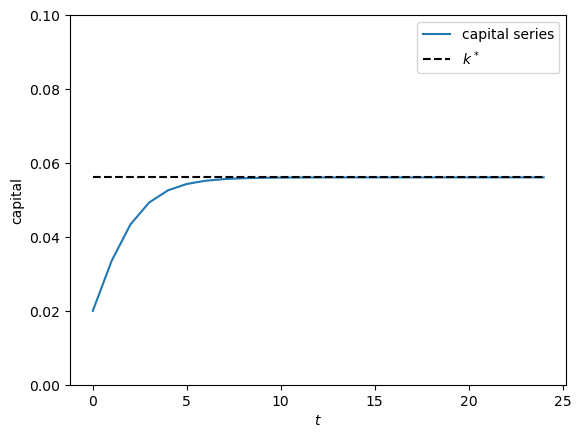

In [164]:
ts_length = 25                          #25 periods
k_series = np.empty(ts_length)          # empty vector of this length
k_series[0] = 0.02                      #initial capital stock
for t in range(ts_length - 1):
    k_series[t+1] = k_update(k_series[t], α, β)   #using earlier defined k_update function , fed in k_t and alpha and beta 

fig, ax = plt.subplots()                #plot
ax.plot(k_series, label="capital series")
ax.plot(range(ts_length), np.full(ts_length, k_star), 'k--', label="$k^*$") #fill in steady state capital stock k^*
ax.set_ylim(0, 0.1)
ax.set_ylabel("capital")
ax.set_xlabel("$t$")
ax.legend()
plt.show()

* invest less over time until reach steady state

If you experiment with different positive initial conditions, you will see that the series always converges to $ k^* $.

Below we also plot the gross interest rate over time.

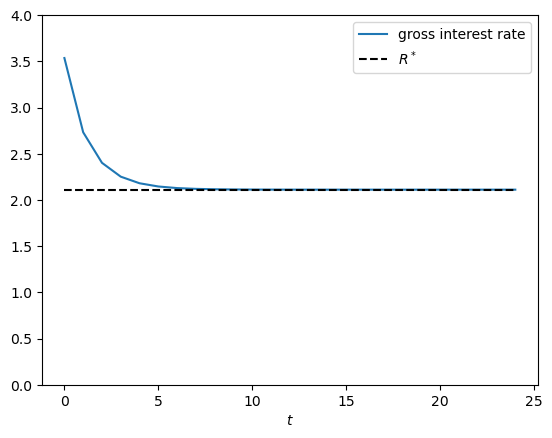

In [168]:
R_series = α * k_series**(α - 1)      #expression from earlier, do for all k's not loop through 

fig, ax = plt.subplots()
ax.plot(R_series, label="gross interest rate")
ax.plot(range(ts_length), np.full(ts_length, R_star), 'k--', label="$R^*$")
ax.set_ylim(0, 4)
ax.set_xlabel("$t$")
ax.legend()
plt.show()

* interest rate always converges to steady state too
* when very high r k was very low gives more marginal product,, dec returns to eventual steady state 

The interest rate reflects the marginal product of capital, which is high when the capital stock is low.

## CRRA preferences

* constant relative risk aversion
* relative to wealth risk aversion is constant

Previously, in our examples, we looked at the case of log utility.

Log utility is a rather special case.

In this section, we are going to assume that $ u(c) = \frac{ c^{1-
\gamma}-1}{1-\gamma} $, where $ \gamma >0, \gamma\neq 1 $.

* if $\gamma=1$ then the $u(c)=log(c)$

* gamma is the risk aversion, constant relative risk aversion

* concave function, higher gamma more curve, as gamma go to 0 more linear 

This function is called the CRRA utility function.

In other respects, the model is the same.

Below we define the utility function in Python and construct a `namedtuple` to store the parameters.

In [173]:
def crra(c, γ):
    return c**(1 - γ) / (1 - γ)

Model = namedtuple('Model', ['α',        # Cobb-Douglas parameter
                             'β',        # discount factor
                             'γ']        # parameter in CRRA utility
                   )

def create_olg_model(α=0.4, β=0.9, γ=0.5):  #alpha, beta, gamma given ,,, lower risk aversion than log u  (curved less) 
    return Model(α=α, β=β, γ=γ)

Let’s also redefine the capital demand function to work with this `namedtuple`.

In [176]:
def capital_demand(R, model):       #unaffected by difference in utility function, doesnt affect firm side 
    return (α/R)**(1/(1-model.α)) 

### Supply

For households, the Euler equation becomes


<a id='equation-euler-crra'></a>
$$
(w_t - s_t)^{-\gamma} = \beta R^{1-\gamma}_{t+1}  (s_t)^{-\gamma} \tag{19}
$$

* from looking at equation 3 to derive
   
Solving for savings, we have


<a id='equation-saving-crra'></a>
$$
s_t 
    = s(w_t, R_{t+1}) 
    = w_t \left [ 
        1 + \beta^{-1/\gamma} R_{t+1}^{(\gamma-1)/\gamma} 
      \right ]^{-1} \tag{20}
$$

Notice how, unlike the log case, savings now depends on the interest rate.

In [179]:
def savings_crra(w, R, model):             #supply/ consumer side is different now 
    α, β, γ = model
    return w / (1 + β**(-1/γ) * R**((γ-1)/γ)) 

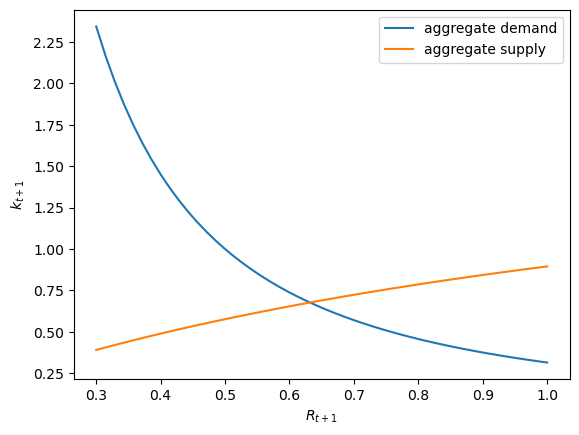

In [181]:
R_vals = np.linspace(0.3, 1)
model = create_olg_model()
w = 2.0

fig, ax = plt.subplots()

ax.plot(R_vals, capital_demand(R_vals, model), 
        label="aggregate demand")
ax.plot(R_vals, savings_crra(w, R_vals, model), 
        label="aggregate supply")

ax.set_xlabel("$R_{t+1}$")
ax.set_ylabel("$k_{t+1}$")
ax.legend()
plt.show()

* gamma =0.5, less curved

* increasing capital supply function bc higher R (rate) we save more  (income effect)

* income vs sub affect, now the substitution effect dominates (such a high R sub from consumption to savings)

* gamma<1 sub effect dominate 

### Exercise to do in class

Re-do the previous plot but with $\gamma = 2$. What do you observe? 


__Solution:__ Two effects: substitution (get higher $R$, you want to save more) and income/wealth (feel richer, want to consume more). At low $\gamma$, you are not very risk averse, i.e., you don't care about removing consumption fluctuations that much and hence, SE dominates and you save more. If $\gamma$ is high, you want to equalize consumption across periods, so you don't save but rather consume more.

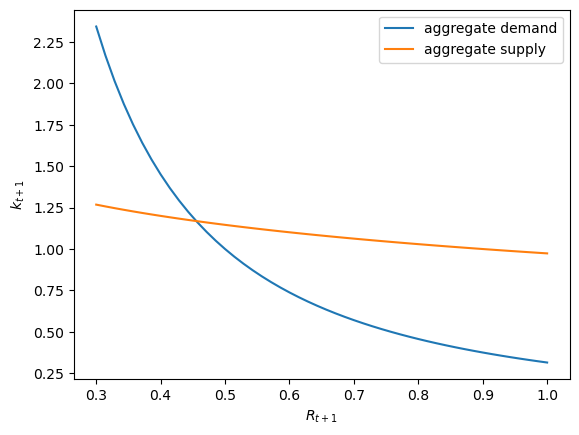

In [189]:
def create_olg_model(α=0.4, β=0.9, γ=2):  #alpha, beta, gamma given ,,, lower risk aversion than log u  (curved less) 
    return Model(α=α, β=β, γ=γ)

R_vals = np.linspace(0.3, 1)
model = create_olg_model()
w = 2.0

fig, ax = plt.subplots()

ax.plot(R_vals, capital_demand(R_vals, model), 
        label="aggregate demand")
ax.plot(R_vals, savings_crra(w, R_vals, model), 
        label="aggregate supply")

ax.set_xlabel("$R_{t+1}$")
ax.set_ylabel("$k_{t+1}$")
ax.legend()
plt.show()

* income effect start to dominate, supply function slope downward

* higher interest rate ppl save less and want to consume more

* if very risk averse, less willing to accept fluctuations in consumption between periods

* if $\gamma=0$ then risk neutral

### Equilibrium

Equating aggregate demand for capital  (see [(11)](#equation-aggregate-demand-capital-olg))
with our new aggregate supply function yields equilibrium capital.

Thus, we set


<a id='equation-equilibrium-crra-2'></a>
$$
w_t \left [ 1 + \beta^{-1/\gamma} R_{t+1}^{(\gamma-1)/\gamma} \right ]^{-1} 
    = \left (\frac{R_{t+1}}{\alpha} \right )^{1/(\alpha - 1)} \tag{21}
$$

This expression is quite complex and we cannot solve for $ R_{t+1} $ analytically.

Combining [(10)](#equation-interest-rate-one) and [(21)](#equation-equilibrium-crra-2) yields


<a id='equation-law-of-motion-capital-crra'></a>
$$
k_{t+1} = \left [ 1 + \beta^{-1/\gamma} (\alpha k^{\alpha - 1}_{t+1})^{(\gamma-1)/\gamma} \right ]^{-1} (1-\alpha)(k_t)^{\alpha} \tag{22}
$$

Again, with this equation and $ k_t $ as given, we cannot solve for $ k_{t+1} $ by pencil and paper.


We are now going to solve for the dynamics of the capital stock in the CRRA case numerically.


To solve for $ k_{t+1} $ given $ k_t $ we use `scipy.optimize.newton`.

Let


<a id='equation-crra-newton-1'></a>
$$
f(k_{t+1}, k_t)
    =
    k_{t+1} 
    \left[ 
        1 + \beta^{-1/\gamma} 
        \left ( 
            \alpha k^{\alpha-1}_{t+1} 
        \right )^{(\gamma-1)/\gamma} 
\right] - (1-\alpha) k^{\alpha}_t =0. \tag{23}
$$

If $ k_t $ is given then $ f $ is a function of unknown $ k_{t+1} $.

Then we can use `scipy.optimize.newton` to solve $ f(k_{t+1}, k_t)=0 $ for $ k_{t+1} $.

First let’s define $ f $.

In [193]:
def f(k_prime, k, model):
    α, β, γ = model.α, model.β, model.γ
    z = (1 - α) * k**α
    a = α**(1-1/γ)
    b = k_prime**((α * γ - α + 1) / γ)
    p = k_prime + k_prime * β**(-1/γ) * a * b
    return p - z

Now let’s define a function that finds the value of $ k_{t+1} $.

In [197]:
def k_update(k, model):
    return optimize.newton(lambda k_prime: f(k_prime, k, model), 0.1)

Finally, here is the 45 degree diagram.

<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
C:\Users\saman\AppData\Local\Temp\ipykernel_19420\459641870.py:14: SyntaxWarning: invalid escape sequence '\c'
  ax.plot(k_grid, k_grid, 'k-', lw=1, alpha=0.7, label='$45^{\circ}$')


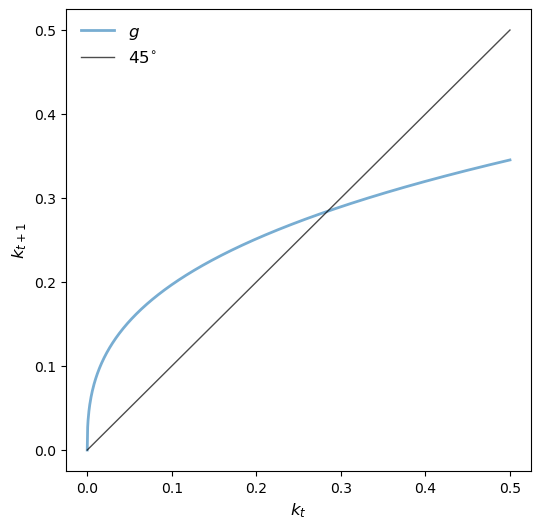

In [200]:
kmin, kmax = 0, 0.5
x = 1000
k_grid = np.linspace(kmin, kmax, x)
k_grid_next = np.empty_like(k_grid)

for i in range(x):
    k_grid_next[i] = k_update(k_grid[i], model)

fig, ax = plt.subplots(figsize=(6, 6))

ymin, ymax = np.min(k_grid_next), np.max(k_grid_next)

ax.plot(k_grid, k_grid_next,  lw=2, alpha=0.6, label='$g$')
ax.plot(k_grid, k_grid, 'k-', lw=1, alpha=0.7, label='$45^{\circ}$')


ax.legend(loc='upper left', frameon=False, fontsize=12)
ax.set_xlabel('$k_t$', fontsize=12)
ax.set_ylabel('$k_{t+1}$', fontsize=12)

plt.show()

The 45 degree diagram shows that there is a unique positive steady state.

The positive steady state can be obtained by setting  $ k_{t+1} = k_t = k^* $ in [(22)](#equation-law-of-motion-capital-crra), which yields

$$
k^* = 
    \frac{(1-\alpha)(k^*)^{\alpha}}
    {1 + \beta^{-1/\gamma} (\alpha (k^*)^{\alpha-1})^{(\gamma-1)/\gamma}}
$$

Unlike the log preference case, the CRRA utility steady state $ k^* $
cannot be obtained analytically.

Instead, we solve for $ k^* $ using the `scipy.optimize.newton` function once again.

We introduce a function $ h $ such that the
positive steady state is the solution of $ h $.


<a id='equation-crra-newton-2'></a>
$$
h(k^*) = k^*  
    \left [ 
        1 + \beta^{-1/\gamma} (\alpha (k^*)^{\alpha-1})^{(\gamma-1)/\gamma} 
    \right ] - (1-\alpha)(k^*)^{\alpha} \tag{24}
$$

Here it is in Python

In [204]:
def h(k_star, model):
    α, β, γ = model.α, model.β, model.γ
    z = (1 - α) * k_star**α
    R1 = α ** (1-1/γ)
    R2 = k_star**((α * γ - α + 1) / γ)
    p = k_star + k_star * β**(-1/γ) * R1 * R2
    return p - z

Let’s apply Newton’s method to find the root:

In [207]:
k_star = optimize.newton(h, 0.2, args=(model,))
print(f"k_star = {k_star}")

k_star = 0.2842087316405406


### Exercise to do in class

Generate three time paths for capital, from
three distinct initial conditions, under the parameterization listed above.

Use initial conditions for $ k_0 $ of $ 0.001, 1.2, 2.6 $ and time series length 10.

In [210]:
ts_length = 10
k0 = np.array([0.001, 1.2, 2.6])

def simulate_ts(model, k0_values, ts_length):

    fig, ax = plt.subplots()

    ts = np.zeros(ts_length)

    # simulate and plot time series
    for k_init in k0_values:
        ts[0] = k_init
        for t in range(1, ts_length):
            ts[t] = k_update(ts[t-1], model)
        ax.plot(np.arange(ts_length), ts, '-o', ms=4, alpha=0.6,
                label=r'$k_0=%g$' %k_init)
    ax.plot(np.arange(ts_length), np.full(ts_length, k_star),
            alpha=0.6, color='red', label=r'$k^*$')
    ax.legend(fontsize=10)

    ax.set_xlabel(r'$t$', fontsize=14)
    ax.set_ylabel(r'$k_t$', fontsize=14)

    plt.show()

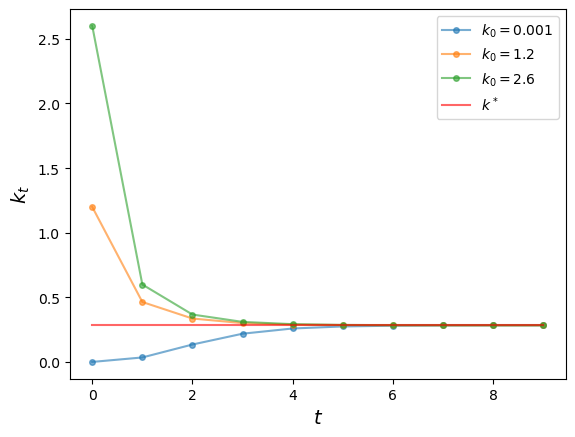

In [212]:
simulate_ts(model, k0, ts_length)